# A sinusoidal source and a square pulse source with the same frequencies and different initial phases


# Import necessary libraries

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial


# Define Function to plot scatterplot

In [4]:
def geometrical(a,s):
    x = np.matmul(a,s)
    x1 = x[0]
    x2 = x[1]
    x1 = np.asarray(x1).ravel()
    x2 = np.asarray(x2).ravel()
    plt.scatter(x1,x2)
    plt.ylabel('x2')
    plt.xlabel('x1')                                                                           
    plt.show()   
    return 0


# Define function to find two most far away point of eachother

In [5]:
import numpy as np
from scipy import spatial

def max_distance_pair(a,s):
    x = np.matmul(a,s)
    x = x.T
    candidates = x[spatial.ConvexHull(x).vertices]
    dist_mat = spatial.distance_matrix(candidates, candidates)
    i, j = np.unravel_index(dist_mat.argmax(), dist_mat.shape)
    print(candidates[i], candidates[j])

# Definition function to plot a line between two most far away point

In [6]:
def plot_line(ponit1,ponit2,source1,source2):
    
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_values)
    a1 = np.array([[1,0.5],[-0.7,1]])
    s = np.asmatrix([source1,source2])
    geometrical(a1,s)
    plt.show()


# Define function to get the coordinates of two points far from each other

In [7]:

def farest_point_of_line (a,s):
    x = np.matmul(a,s)
    x1 = x[0]
    x2 = x[1]
    x1 = np.asarray(x1).ravel()
    x2 = np.asarray(x2).ravel()
    m = max(x1)
    n = np.where(x1==m)
    n =  n[0]
    k = x2[n]
    return [m,k[0]]

# Define function to calculate the slope between two points

In [8]:
def slope(p1,p2):
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    return m

# Define separation function

In [9]:

def sepration(a,b):
    A1 = np.array([[1,a],[b,1]])
    A1_inv = np.linalg.inv(A1)
    S = np.matmul(A1_inv,x)
    return S
    

# Define MSE


In [10]:

def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

# Define Function to plot output

In [11]:

def output_geometrical(s):
    s1 = s[0]
    s2 = s[1]
    s1 = np.asarray(s1).ravel()
    s2 = np.asarray(s2).ravel()
    plt.scatter(s1,s2)
    plt.ylabel('s2')
    plt.xlabel('s1')                                                                           
    plt.show()   
    return 0


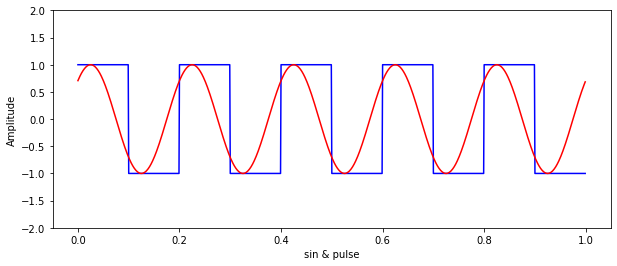

In [12]:


t = np.linspace(0, 1, 1000, endpoint=False)
pulse = signal.square(10 * np.pi * t)
sin = np.sin(10 * np.pi * t + np.pi/4 )


plt.figure(figsize = (10,4))
plt.plot(t,pulse, 'b')
plt.plot(t,sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('sin & pulse')
plt.ylim(-2,2)
plt.show()


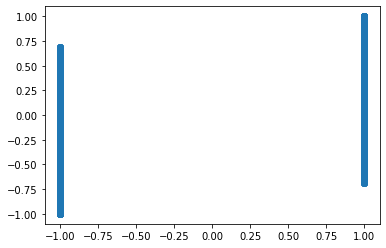

In [13]:

plt.scatter(pulse , sin)
plt.show()

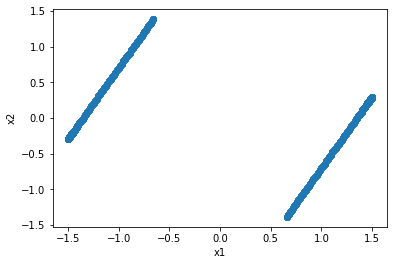

0

In [14]:
a1 = np.array([[1,0.5],[-0.7,1]])
s = np.asmatrix([pulse , sin])
x = np.matmul(a1,s)
geometrical(a1,s)

# Finding two far away points

In [15]:
a1 = np.array([[1,0.5],[-0.7,1]])
s = np.asmatrix([pulse , sin])
max_distance_pair(a1,s)

[[ 0.65772645 -1.38454711]] [[-0.65772645  1.38454711]]


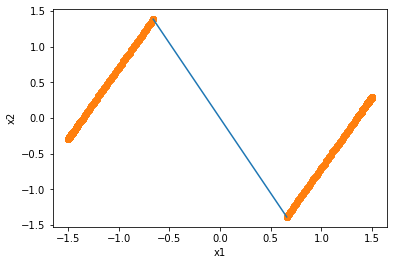

In [16]:
point1 = [ 0.65772645, -1.38454711]
point2 = [-0.65772645 , 1.38454711]
plot_line(point1,point2,pulse , sin)

In [17]:
farest_point_of_line(a1,s)

[1.5, 0.30000000000000004]

In [18]:
# Three points are the corners of parallelograms
point1 = [ 0.65772645, -1.38454711]
point2 = [-0.65772645 , 1.38454711]
point3 = [1.5, 0.30000000000000004]


# Define Slope


In [18]:
def slope(p1,p2):
    m = (p2[1] - p1[1])/(p2[0] - p1[0])
    return m

In [19]:
# Obtaining mixed matrix values
a = 1 / slope(point1,point3)
b = slope(point2,point3)
print(a,',,,,',b)

0.49999999703184317 ,,,, -0.5026342009201398


In [20]:
S = sepration(a,b)
S

matrix([[ 1.07886322,  1.07886322,  1.07886322, ..., -1.07886322,
         -1.07886322, -1.07886322],
        [ 0.54938034,  0.57124218,  0.59238462, ...,  0.79515044,
          0.81903831,  0.84227355]])

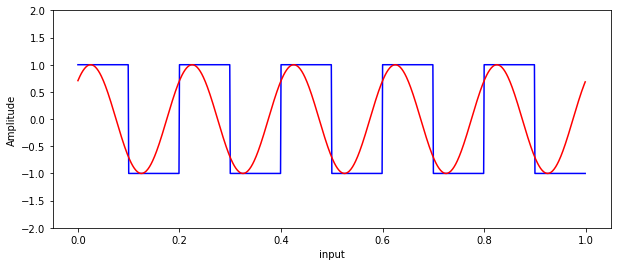

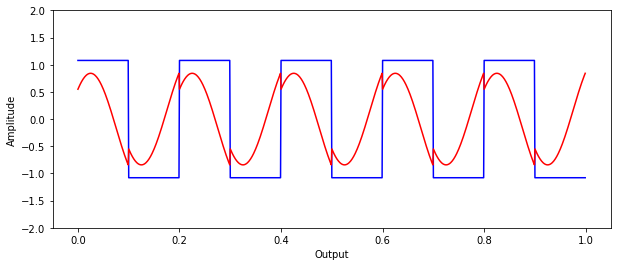

In [21]:
t = np.linspace(0, 1, 1000, endpoint=False)
pulse = signal.square(10 * np.pi * t)
sin = np.sin(10 * np.pi * t + np.pi/4 )
plt.figure(figsize = (10,4))
plt.plot(t,pulse, 'b')
plt.plot(t,sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('input')
plt.ylim(-2,2)
plt.show()


###############################

Pulse = S[0] 
Sin = S[1]
Pulse = np.asarray(Pulse).ravel()
Sin = np.asarray(Sin).ravel()
t = np.linspace(0, 1, 1000, endpoint=False)
plt.figure(figsize = (10,4))
plt.plot(t,Pulse, 'b')
plt.plot(t,Sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Output')
plt.ylim(-2,2)
plt.show()






# Plot scatterplot of output

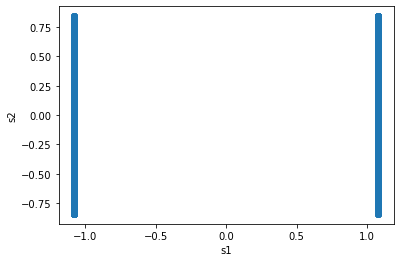

0

In [22]:
output_geometrical(S)

In [23]:
mse(s,S)

0.015548519855404277